In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

## Polynomial Regression

In [2]:
def make_poly_matrix(x, deg=5):
    # given a d-dim vector x = [x1, x2, .. xd], make a d x (M+1) matrix 
    # 1 x1 x1**2 ... x1**M
    # 1 x2 x2**2 ... x2**M
    # ..
    # 1 xd xd**2 ... xd**M
    x = np.asarray(x)
    X = [np.ones(len(x))]
    x1 = x.copy()
    for i in np.arange(deg):
        X.append(x1)
        x1 = x1 * x

    X = np.asarray(X).T # d x M matrix of input 
    # print(X.shape)
    return X

In [3]:
def poly_regression(x_train, y_train, deg=9, alpha=0):
    # fit polynomial regression of given degree with L2 regularizer alpha
    X = make_poly_matrix(x_train, deg=deg)
    w_hat = np.linalg.pinv(X.T @ X + alpha*np.identity(X.shape[1])) @ X.T @ y_train
    y_hat_train = X @ w_hat
    return y_hat_train, w_hat

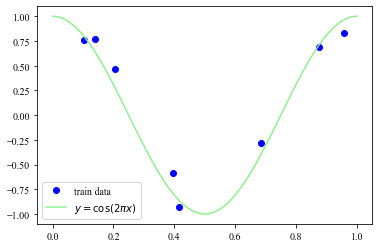

In [4]:
# Generate train and test data from y = sin(2\pi x) + N(0,\sigma^2)

np.random.seed(1)
N = 8
sigma = 0.35
x_train = []
y_train = []
x_test = []
y_test = []
for i in np.arange(N):
    U1 = np.random.rand()
    U2 = np.random.rand()
    e1 = np.random.normal(0,sigma**2)
    e2 = np.random.normal(0,sigma**2) 
    x_train.append(U1)
    x_test.append(U2)
    y_train.append(np.cos(2*np.pi*U1)+e1)
    y_test.append(np.cos(2*np.pi*U2)+e2)
    
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

# make plot
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(x_train, y_train, 'o', color='blue', label="train data")
x = np.linspace(0, 1, 100)
ax.plot(x, np.cos(2*np.pi*x), color='lightgreen', label="$y=\cos(2\pi x)$")
ax.legend()

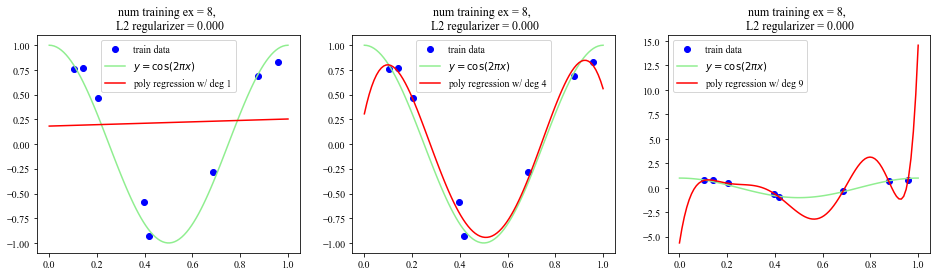

In [5]:
# plot fitted polynomial regression curve
deg_list = [1,4,9] # degree of polynomial 
alpha_list = [0, 0, 0]
fig, ax = plt.subplots(nrows=1, ncols=len(deg_list), figsize=[16, 4])
for i in np.arange(len(deg_list)):
    # make plot
    M = deg_list[i]
    alpha = alpha_list[1]
    y_hat_train, w_hat = poly_regression(x_train, y_train, deg=M, alpha=alpha)
    ax[i].plot(x_train, y_train, 'o', color='blue', label="train data")
    x = np.linspace(0, 1, 100)
    ax[i].plot(x, np.cos(2*np.pi*x), color='lightgreen', label="$y=\cos(2\pi x)$")
    # ax.plot(x_train, y_hat_train, 'o', color = 'red')
    y_poly = make_poly_matrix(x, deg=M) @ w_hat
    ax[i].plot(x, y_poly, color = 'red', label="poly regression w/ deg %i" % M)
    ax[i].title.set_text("num training ex = %i, \n L2 regularizer = %.3f" % (N, alpha)) 
    ax[i].legend()
    plt.savefig('poly_fitting_ex_2.pdf', bbox_inches='tight')
    

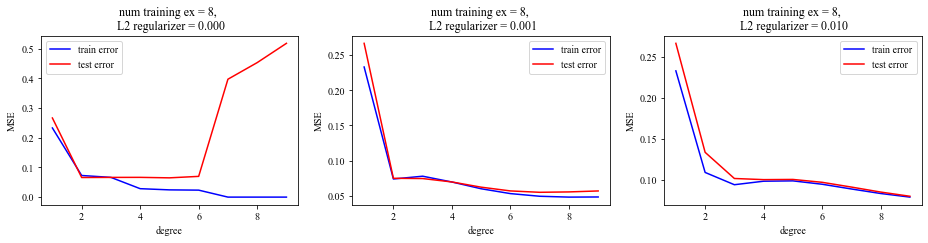

In [6]:
# plot the test error for multiple values of hyperparameters 

deg_list = np.arange(1,10)
alpha_list = [0, 0.001, 0.01]
error_train_mx = np.zeros(shape=[len(deg_list), len(alpha_list)])
error_test_mx = np.zeros(shape=[len(deg_list), len(alpha_list)])

for i in np.arange(len(deg_list)):
    for j in np.arange(len(alpha_list)):
        y_hat_train, w_hat = poly_regression(x_train, y_train, deg=deg_list[i], alpha=alpha_list[j])
        y_hat_test = make_poly_matrix(x_test, deg=deg_list[i]) @ w_hat
        error_train_mx[i, j] = np.linalg.norm(y_train-y_hat_train, 2)/N
        error_test_mx[i, j] = np.linalg.norm(y_test-y_hat_test, 2)/N
# print('!!!', error_mx)


# make plot
ncols = 3
fig, ax = plt.subplots(nrows=1, ncols=ncols, figsize=[13,4])
for i in np.arange(ncols):
    ax[i].plot(deg_list, error_train_mx[:,i], color='blue', label="train error")
    ax[i].plot(deg_list, error_test_mx[:,i], color='red', label="test error")
    ax[i].set_xlabel('degree', fontsize=10)
    ax[i].title.set_text("num training ex = %i, \n L2 regularizer = %.3f" % (N, alpha_list[i])) 
    ax[i].set_ylabel('MSE', fontsize=10)
    ax[i].legend()
plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.savefig('poly_error_ex_2.pdf')


## Polynomial Regression + Gaussian Noise

In [7]:
def eval_polynomial(p,x):
    # p = list of coefficients; p[0] = constant term
    return sum((a*x**i for i,a in enumerate(p)))

In [8]:
def uniform(a,b):
    # sample a uniform random variable from the interval [a,b]
    return a + (b-a)*np.random.rand()

In [9]:
def poly_regression_ML(x_train, y_train, deg=9):
    # compute MLE for the coefficients w and noise variance 
    # for the poylnimal regression model with given degree
    y_hat_train, w_hat = poly_regression(x_train, y_train, deg=deg, alpha=0)
    var_hat = (1/len(x_train))*np.linalg.norm(y_train - y_hat_train,2)**2 
    return w_hat, var_hat

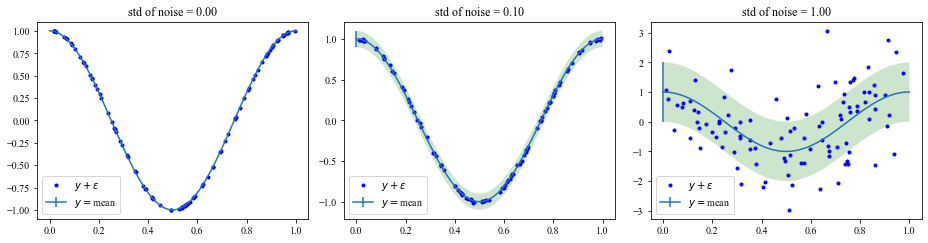

In [10]:
np.random.seed(1)
N = 100
#p = [-6,11.5,-6,1] # coefficients of the polynomial; p[0]=constarnt term

# make plot
sigma_list = [0, 0.1, 1]
fig, ax = plt.subplots(nrows=1, ncols=len(sigma_list), figsize=[13,4])
x = np.linspace(0, 1, 100)
y = np.cos(2*np.pi*x)

for i in np.arange(len(sigma_list)):
    sigma = sigma_list[i]
    x_train = []
    y_train = []
    x_test = []
    y_test = []
    for k in np.arange(N):
        U1 = uniform(0,1)
        e1 = np.random.normal(0,sigma**2)
        x_train.append(U1)
        y_train.append(np.cos(2*np.pi*U1) +e1)

    x_train = np.asarray(x_train)
    y_train = np.asarray(y_train)
    
    markers, caps, bars = ax[i].errorbar(x, y, yerr=sigma, fmt='', marker=None, label="$y=$mean", errorevery=100)
    ax[i].fill_between(x, y - sigma, y + sigma, facecolor='g', alpha=0.2)
    ax[i].plot(x_train, y_train, '.', color='blue', label="$y+\epsilon$")
    ax[i].title.set_text("std of noise = %.2f" % sigma) 
    ax[i].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.savefig('poly_noise_ex.pdf')

## Bayesian Polynomial Regression

In [11]:
def bayesian_poly_regression(x_train, y_train, x, deg=9, tau=0.1, sigma=0.1):
    # fit Bayesian polynomial regression of given degree with Gaussian prior on coefficients w:
    # w ~ N(0, \tau^2 I)
    # sigma = known noise std
    # Output is the mean and variance of the predictive Gaussian distribution for input x
    x_vec = make_poly_matrix([x], deg=deg).T
    X = make_poly_matrix(x_train, deg=deg)
    S1 = tau**(-2) * np.identity(deg+1) + sigma**(-2) * X.T @ X
    S = np.linalg.pinv(S1)
    mean_w = sigma**(-2) * S @ X.T @ y_train
    mean = mean_w.T @ x_vec
    var = sigma**(2) + x_vec.T @ S @ x_vec
    return mean[0], var[0,0]

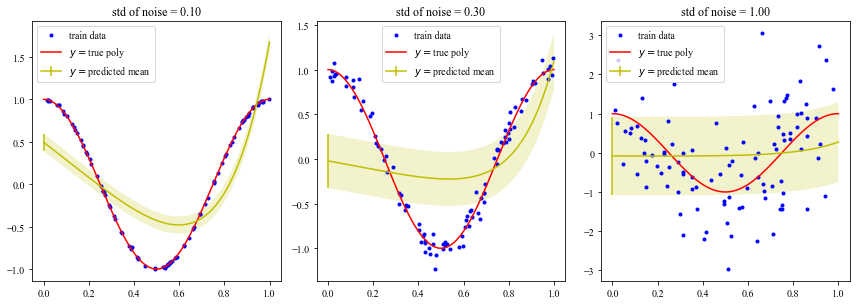

In [12]:
# make plot
np.random.seed(1)
N = 100
p = [-6,11.5,-6,1] # coefficients of the polynomial; p[0]=constarnt term
deg = 9
tau = 0.1 # prior std of coefficients w
sigma_list = [0.1, 0.3, 1]

fig, ax = plt.subplots(nrows=1, ncols=len(sigma_list), figsize=[12,5])
x = np.linspace(0, 1, 100)
y = np.cos(2*np.pi*x)

for i in np.arange(len(sigma_list)):
    sigma = sigma_list[i]
    
    # generate data 
    x_train = []
    y_train = []
    for k in np.arange(N):
        U1 = uniform(0,1)
        e1 = np.random.normal(0,sigma**2)
        x_train.append(U1)
        y_train.append(np.cos(2*np.pi*U1)+ e1)

    x_train = np.asarray(x_train)
    y_train = np.asarray(y_train)

    # compute prediction
    y_hat_mean = []
    y_hat_std = []
    for j in np.arange(len(x)):
        mean, var = bayesian_poly_regression(x_train, y_train, x=x[j], deg=deg, tau=tau, sigma=sigma)
        y_hat_mean.append(mean)
        y_hat_std.append(np.sqrt(var))

    y_hat_mean = np.asarray(y_hat_mean)
    y_hat_std = np.asarray(y_hat_std)
    
    markers, caps, bars = ax[i].errorbar(x, y_hat_mean, yerr=y_hat_std, fmt='', color='y', marker=None, label="$y=$predicted mean", errorevery=100)
    ax[i].fill_between(x, y_hat_mean - y_hat_std, y_hat_mean + y_hat_std, facecolor='y', alpha=0.2)
    ax[i].plot(x_train, y_train, '.', color='blue', label="train data")
    ax[i].plot(x, y, color='red', label="$y=$true poly")
    ax[i].title.set_text("std of noise = %.2f" % sigma) 
    ax[i].legend()
    

plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.savefig('poly_noise_bayesian_ex.pdf', bbox_inches='tight')